## 오차역전파 (Backpropagation)


### 오차역전파 알고리즘
- 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함

- 각 layer별로 역전파학습을 위해 중간값을 저장

- 손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
  마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  각 layer를 통과할 때마다 저장된 값을 이용

- 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신


### 오차역전파 학습의 특징
- 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에  
  학습 소요시간이 매우 단축!

- 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용


### 신경망 학습에 있어서 미분가능의 중요성
- 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값,  
  즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여  
  모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)

<sub>출처: https://www.pinterest.co.kr/pin/424816177350692379/</sub>

### 합성함수의 미분 (연쇄법칙, chain rule)

## $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  
 

- 여러 개 연속으로 사용가능  
  ## $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x} 
  $
- 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)
<sub>출처: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/</sub>

- **오차역전파의 직관적 이해**
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



#### 합성함수 미분(chain rule) 예제

![](https://miro.medium.com/max/1000/1*azqHvbrNsZ8AIZ7H75tbIQ.jpeg)

<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

  #### $\quad a=-1, \ b=3, \ c=4$,
  #### $\quad x = a + b, \ y = b + c, \ f = x * y \ 일 때$    



  ### $\quad \begin{matrix}\frac{\partial f}{\partial x} &=& y\ + \ x \ \frac{\partial y}{\partial x} \\
  &=& (b \ + \ c) \ + \ (a \ +\ b)\ \times \ 0 \\
  &=& 7 \end{matrix}$

  ### $\quad \begin{matrix}\frac{\partial f}{\partial y} &=& x\ + \ \frac{\partial x}{\partial y} \ y \\
  &=& (a \ + \ b) \ + \ 0 \times (b \ +\ c) \\
  &=& 2 \end{matrix}$

   <br>

  ### $ \quad \begin{matrix} \frac{\partial x}{\partial a} &=& 1 \ + \ a \ \frac{\partial b}{\partial a} \\
  &=& 1 \end{matrix} $
  ### $ \quad \begin{matrix} \frac{\partial y}{\partial c} &=& \frac{\partial b}{\partial c}\ + 1 \\
   &=& 1 \end{matrix} $
  
  <br>

  ### $ \quad \begin{matrix} \frac{\partial f}{\partial a} &=& \frac{\partial f}{\partial x} \times \frac{\partial x}{\partial a} \\
  &=& y \times 1 \\ 
  &=& 7 \times 1 = 7 \\
  &=& 7  \end{matrix} $
    
  ### $ \quad \begin{matrix} \frac{\partial f}{\partial b}\ 
  &=& \frac{\partial x}{\partial b} \ y \ + \ x \ \frac{\partial y}{\partial b}  \\
  &=& 1 \times 7 + 2 \times 1  \\
  &=& 9 \end{matrix} $
  

  
  

### 덧셈, 곱셈 계층의 역전파
- 위 예제를 통해 아래 사항을 알 수 있음

  #### 1. $\quad z = x + y$ 일 때,
  ## $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1 $

  #### 2. $\quad t = xy$ 일 때,
  ## $\frac{\partial t}{\partial x} = y, \frac{\partial t}{\partial y} = x$


In [12]:
import numpy as np 

In [1]:
class Mul():
    
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        result = x*y
        return result

    def backward(self, dresult):
        dx = dresult * self.y
        dy = dresult * self.x
        return dx, dy

In [2]:
class Add():
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        result = x + y
        return result

    def backward(self, dresult):
        dx = dresult * 1
        dy = dresult * 1
        return dx, dy

In [3]:
a, b, c = -1, 3, 4
x = Add()
y = Add()
f = Mul()

In [6]:
x_result = x.forward(a, b)
y_result = y.forward(b, c)
print(x_result, y_result, f.forward(x_result, y_result))

2 7 14


In [11]:
dresult = 1
dx_mul, dy_mul = f.backward(dresult)

da_add, db_add_1 = x.backward(dx_mul)
db_add2, dc_add = y.backward(dy_mul)

print(dx_mul, dy_mul)
print(da_add)
print(db_add_1 + db_add2)
print(dc_add)

7 2
7
9
2


![](https://miro.medium.com/max/2000/1*U3mVDYuvnaLhJzIFw_d5qQ.png)
<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

### 활성화 함수(Activation)에서의 역전파

#### 시그모이드(Sigmoid) 함수

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

<sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>

- 수식 
  # $\quad y = \frac{1}{1 + e^{-x}} $일 때,

  ## $\quad \begin{matrix}y' &=& (\frac{1}{1 + e^{-x}})' \\
  &=& \frac{-1}{(1 + e^{-x})^2}\ \times \ (-e^{-x}) \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ \frac{e^{-x}}{1 + e^{-x}} \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ (1 - \frac{1}{1 + e^{-x}}) \\
  &=& y\ (1\ - \ y)
  \end{matrix}$

In [13]:
class Sigmoid():

    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1+np.exp(-x))
        return out

    def backward(self, dout):
        dx = dout * (1-self.out) * self.dout
        return dx

#### ReLU 함수

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

<sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


- 수식  

  ### $\qquad y=
  \begin{cases}
  x & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$ 일 때,

  <br>

  ### $\qquad \frac{\partial y}{\partial x}=
  \begin{cases}
  1 & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$

In [ ]:
class ReLU():
    def __init__(self):
        self.out = None

    def forward(self, x):
        self.mask = (x < 0)
        out = x.copy()
        out[x<0] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

### 행렬 연산에 대한 역전파

# $\qquad Y = X \bullet W + B$

#### 순전파(forward)
  
  - 형상(shape)을 맞춰줘야함
  - 앞서 봤던 곱셈, 덧셈 계층을 합친 형태

In [14]:
import numpy as np

X = np.random.rand(3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(3,)
(3, 2)
(2,)


In [15]:
Y = np.dot(X, W) + B
print(Y.shape)

(2,)


In [18]:
X = np.random.rand(3)
W = np.random.rand(2, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(3,)
(2, 2)
(2,)


In [21]:
# Y = np.dot(X, W) + B
# print(Y.shape)
# dot 프로덕트를 위한 쉐이프가 안 맞는다고 오류를 리턴한다.

#### 역전파(1)

##  $\  Y = X \bullet W$
- $X :\ \ (2,\ )$

- $W :\ \ (2,\ 3)$

- $X \bullet W :\ \ (3,\ )$

- $\frac{\partial L}{\partial Y} :\ \ (3,\ )$

- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T ,\ (2,\ )$

- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} ,\ (2,\ 3)$



In [22]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
Y = np.dot(X, W)

print("X\n{}" . format(X))
print("W\n{}" . format(W))
print("Y\n{}" . format(Y))

# 다음은 정상적으로 포워드 한 결과이다.

X
[-0.85801053 -1.50173865]
W
[[-2.00049839  0.01940293  0.10845018]
 [-0.90648799 -0.30190488  2.56928632]]
Y
[ 3.07775674  0.43673431 -3.95144797]


In [25]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
# 다시 역전파 한 내용이다.

dL_dY
[ 1.97461693  0.22832257 -0.6830262 ]
dL_dX
[-4.01986217 -3.61378811]
dL_dW
[[-1.69424211 -0.19590317  0.58604367]
 [-2.96535857 -0.34288083  1.02572685]]


#### 역전파(2)

## $\ (2)\  Y = X \bullet W + B$
- $X, W$는 위와 동일

- $B: \ (3, )$

- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, \ (3,\ )$

In [28]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
B = np.random.randn(3)

Y = np.dot(X, W)+B
print(Y)

[-0.52753701 -1.56290022 -3.19920862]


In [32]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))
dL_dB = dL_dY

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[ 1.10042453  1.05819862 -0.92445885]
dL_dX
[0.93149492 0.4012831 ]
dL_dW
[[ 0.56664712  0.54490352 -0.47603623]
 [-1.5730832  -1.51272025  1.32153605]]
dL_dB
[ 1.10042453  1.05819862 -0.92445885]


#### 배치용 행렬 내적 계층
- N개의 데이터에 대해,  
# $\qquad Y = X \bullet W + B$

  - $X : \quad  (N,\ 3)$

  - $W : \quad  (3,\ 2)$

  - $B : \quad  (2,\ )$
  

In [33]:
X = np.random.rand(4, 3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(4, 3)
(3, 2)
(2,)


In [34]:
print("X\n{}".format(X))
print("W\n{}".format(W))
print("B\n{}".format(B))

X
[[0.68719756 0.13826028 0.18242691]
 [0.48771433 0.89236825 0.89943061]
 [0.61955449 0.85630572 0.29169214]
 [0.6875389  0.25421077 0.95009063]]
W
[[0.60537335 0.69449134]
 [0.41290483 0.49478006]
 [0.93151046 0.10321146]]
B
[0.08125118 0.90464894]


In [35]:
Y = np.dot(X, W) + B 
print("Y\n{}".format(Y))
print("Y.shape\n{}".format(Y.shape))

Y
[[0.72428319 1.46913867]
 [1.58279262 1.77771988]
 [1.08160001 1.78871314]
 [1.48745312 1.60597741]]
Y.shape
(4, 2)


In [37]:
dL_dY = np.random.randn(4, 2)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.T, dL_dY)
dL_dB = np.sum(dL_dY, axis=0)

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[[-0.55129738  0.89645956]
 [-1.7762123   0.42918325]
 [-0.54811791  0.00904853]
 [ 1.35624651 -0.17345433]]
dL_dX
[[ 0.28884266  0.21591697 -0.42101437]
 [-0.77720754 -0.52105531 -1.6102637 ]
 [-0.32553185 -0.2218435  -0.50964365]
 [ 0.70057297  0.47417899  1.24545533]]
dL_dW
[[-0.65225109  0.71171311]
 [-1.78584201  0.4705886 ]
 [-0.56947578  0.38740096]]
dL_dB
[-1.51938108  1.16123702]


In [38]:
class Layer():
    def __init__(self):
        self.W = np.random.randn(3, 2)
        self.b = np.random.randn(2)
        self.x = None 
        self.dW = None 
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

In [39]:
np.random.seed(111)

layer = Layer()

In [42]:
# 순전파부터 실시한다.

X = np.random.rand(2, 3)
Y = layer.forward(X)

print(X)

[[0.79396256 0.84056965 0.81520746]
 [0.99095485 0.57727383 0.81376692]]


In [43]:
dout = np.random.rand(2, 2)
dout_dx = layer.backward(dout)

print(dout_dx)

[[-0.46715758  0.62077034 -0.34441262]
 [-0.4744387   0.64220888 -0.40603874]]


### MNIST 분류 with 역전파


#### Modules Import

In [44]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from collections import OrderedDict
plt.style.use("seaborn")

#### 데이터 로드

In [47]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_classes = 10

#### 데이터 전처리

In [48]:
X_train, X_test = X_train.reshape(-1, 28 * 28).astype(np.float32), X_test.reshape(-1, 28 * 28).astype(np.float32)

X_train /= .255
X_test /= .255

y_train = np.eye(num_classes)[y_train]

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000,)


#### Hyper Parameters

In [87]:
epochs = 1000
learning_rate = 1e-3
batch_size = 100
train_size = X_train.shape[0]

#### Util Functions

In [53]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(pred_y, true_y):
    return 0.5 * np.sum((pred_y - true_y)**2)

def cross_entropy_error(pred_y, true_y):
    if pred_y.ndim == 1:
        true_y = true_y.reshape(1, true_y.size)
        pred_y = pred_y.reshape(1, pred_y.size)

    if true_y.size == pred_y.size:
        true_y = true_y.argmax(axis=1)
    
    batch_size = pred_y.shape[0]
    return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + 1e-7)) / batch_size

def softmax_loss(X, true_y):
    pred_y = softmax(X)
    return cross_entropy_error(pred_y, true_y)

#### Util Classes

##### ReLU

In [73]:
class ReLU():
    def __init__(self):
        self.out = None 
    
    def forward(self, x):
        self.mask = (x<0)
        out = x.copy()
        out[x<0] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

##### Sigmoid

In [74]:
class Sigmoid():
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        return out 

    def backward(self, dout):
        dx = dout * (1 - self.out) * self.dout 
        return dx

##### Layer

In [75]:
class Layer():

    def __init__(self, W, b):
        self.W = W
        self.b = b 

        self.x = None 
        self.origin_x_shape = None 

        self.dL_dW = None 
        self.dL_db = None 

    def forward(self, x):
        self.origin_x_shape = x.shape

        x = x.reshape(x.shape[0], -1)

        self.x = x 

        out = np.dot(self.x, self.W) + self.b

        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dL_dW = np.dot(self.x.T, dout) 
        self.dL_db = np.sum(dout, axis=0)
        dx = dx.reshape(*self.origin_x_shape)
        return dx

#### Softmax

In [76]:
class Softmax():

    def __init__(self):
        self.loss = None 
        self.y = None         # 출력
        self.t = None         # 원핫 인코딩 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size 

        return dx

In [89]:
class MyModel():
    def __init__(self, input_size, hidden_size_list, output_size, act_func='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        self.__init_weights(act_func)

        act_layer = {'sigmoid' : Sigmoid, 'relu' : ReLU}
        self.layers = OrderedDict()

        for idx in range(1, self.hidden_layer_num + 1):
            self.layers["Layer" + str(idx)] = Layer(self.params["W" + str(idx)], self.params["b" + str(idx)])
            self.layers['Activation_Function' + str(idx)] = act_layer[act_func]()

        idx = self.hidden_layer_num + 1

        self.layers['Layer' + str(idx)] = Layer(self.params["W" + str(idx)], self.params['b' + str(idx)])

        self.last_layer = Softmax()

    def __init_weights(self, activation):
        weight_std = None
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]

        for idx in range(1, len(all_size_list)):
            if activation.lower() == 'relu':
                weight_std = np.sqrt(2 / self.input_size)
            elif activation.lower() == 'sigmoid':
                weight_std = np.sqrt(1 / self.input_size)
                # 사비에르 초기화

            self.params["W" + str(idx)] = weight_std * np.random.randn(all_size_list[idx - 1], all_size_list[idx])
            self.params['b' + str(idx)] = np.random.randn(all_size_list[idx])

    def predict(self, x):

        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x

    def loss(self, x, true_y):
        pred_y = self.predict(x)

        return self.last_layer.forward(pred_y, true_y)

    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        pred_y = np.argmax(pred_y, axis=1)

        if true_y.ndim != 1:
            true_y = np.argmax(true_y, axis=1)
        
        accuracy = np.sum(pred_y == true_y) / float(x.shape[0])

        return accuracy
    
    def gradient(self, x, t):
        self.loss(x, t)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)
        
        grads = {}

        for idx in range(1, self.hidden_layer_num + 2):
            grads["W" + str(idx)] = self.layers["Layer" + str(idx)].dL_dW
            grads["b" + str(idx)] = self.layers["Layer" + str(idx)].dL_db
        
        return grads

#### 모델 생성 및 학습

In [90]:
model = MyModel(28 * 28, [100, 64, 32], 10, act_func='relu')

In [93]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [94]:
for epoch in range(epochs):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = model.gradient(x_batch, y_batch)

    for key in model.params.keys():
        model.params[key] -= learning_rate * grad[key]

    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if epoch%50 == 0:
        train_acc = model.accuracy(X_train, y_train)
        test_acc = model.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch : {}, train accuracy : {}, test accuracy : {}".format(epoch+1, train_acc, test_acc))
        

epoch : 1, train accuracy : 0.14886666666666667, test accuracy : 0.1486
epoch : 51, train accuracy : 0.5234, test accuracy : 0.5311
epoch : 101, train accuracy : 0.65155, test accuracy : 0.6608
epoch : 151, train accuracy : 0.7167666666666667, test accuracy : 0.7201
epoch : 201, train accuracy : 0.7526333333333334, test accuracy : 0.7622
epoch : 251, train accuracy : 0.7843833333333333, test accuracy : 0.789
epoch : 301, train accuracy : 0.8026166666666666, test accuracy : 0.8084
epoch : 351, train accuracy : 0.8155333333333333, test accuracy : 0.8185
epoch : 401, train accuracy : 0.8260666666666666, test accuracy : 0.8284
epoch : 451, train accuracy : 0.8377666666666667, test accuracy : 0.84
epoch : 501, train accuracy : 0.8474666666666667, test accuracy : 0.85
epoch : 551, train accuracy : 0.8550166666666666, test accuracy : 0.8555
epoch : 601, train accuracy : 0.8582666666666666, test accuracy : 0.8559
epoch : 651, train accuracy : 0.8656166666666667, test accuracy : 0.8653
epoch : 

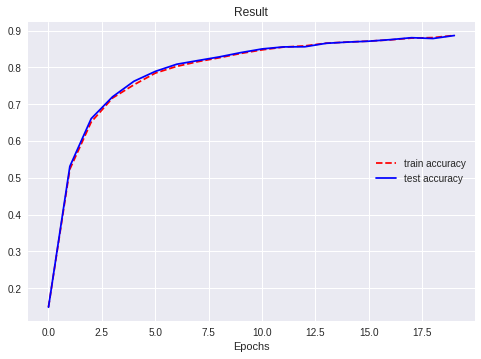

In [97]:
plt.plot(np.arange(1000//50), train_acc_list, 'r--', label="train accuracy")
plt.plot(np.arange(1000//50), test_acc_list, 'b', label='test accuracy')

plt.title("Result")
plt.xlabel('Epochs')
plt.legend(loc=5)
plt.show()

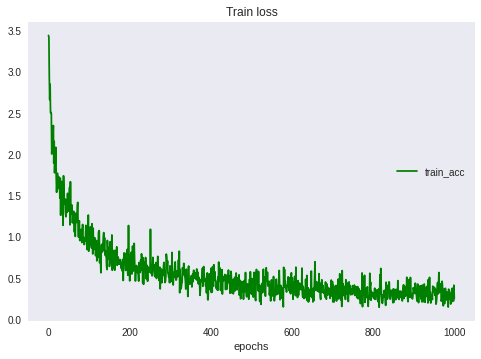

In [98]:
plt.plot(np.arange(1000), train_loss_list, 'green', label='train_acc')
plt.title('Train loss')
plt.xlabel('epochs')
plt.legend(loc=5)
plt.grid()
plt.show()